### Bank Marketing Data Set 
http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#


Attribute Information:

Input variables:
### bank client data:
1 - age (numeric)<br>
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')<br>
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)<br>
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')<br>
5 - default: has credit in default? (categorical: 'no','yes','unknown')<br>
6 - housing: has housing loan? (categorical: 'no','yes','unknown')<br>
7 - loan: has personal loan? (categorical: 'no','yes','unknown')<br>
### related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone') <br>
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')<br>
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')<br>
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.<br>
### other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)<br>
14 - previous: number of contacts performed before this campaign and for this client (numeric)<br>
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
<br>
### social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)<br>
17 - cons.price.idx: consumer price index - monthly indicator (numeric) <br>
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) <br>
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)<br>
20 - nr.employed: number of employees - quarterly indicator (numeric)<br>

Output variable (desired target):<br>
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')<br>

Citation Request:<br>

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014<br>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import auc, accuracy_score, roc_auc_score

#Loading the dataset
dataset = pd.read_csv('bank-additional-full.csv',delimiter=";")
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [2]:
dataset.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [48]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [29]:
#removing rows with unknown values
dataset = dataset.replace(to_replace='unknown', value=np.nan).dropna()
dataset = dataset.replace(to_replace=np.nan, value='unknown')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30488 entries, 0 to 41187
Data columns (total 21 columns):
age               30488 non-null int64
job               30488 non-null object
marital           30488 non-null object
education         30488 non-null object
default           30488 non-null object
housing           30488 non-null object
loan              30488 non-null object
contact           30488 non-null object
month             30488 non-null object
day_of_week       30488 non-null object
duration          30488 non-null int64
campaign          30488 non-null int64
pdays             30488 non-null int64
previous          30488 non-null int64
poutcome          30488 non-null object
emp.var.rate      30488 non-null float64
cons.price.idx    30488 non-null float64
cons.conf.idx     30488 non-null float64
euribor3m         30488 non-null float64
nr.employed       30488 non-null float64
y                 30488 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

### Categorical Analysis

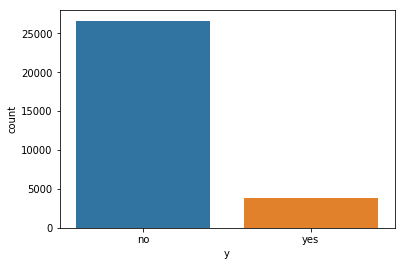

In [5]:
# Exploratory Data Analysis (EDA) of features
sns.countplot(x='y', data=dataset)

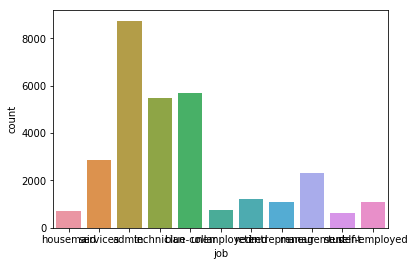

In [7]:
#Job
sns.countplot(x="job", data=dataset)

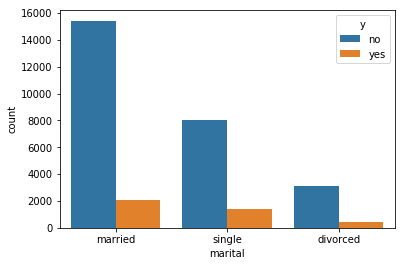

In [9]:
#marital
#sns.catplot(x='y', col='marital', kind='count', data=dataset)
sns.countplot(data=dataset,x = 'marital',hue = 'y')

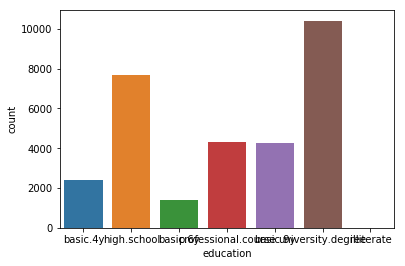

In [11]:
#education
sns.countplot(x="education", data=dataset)

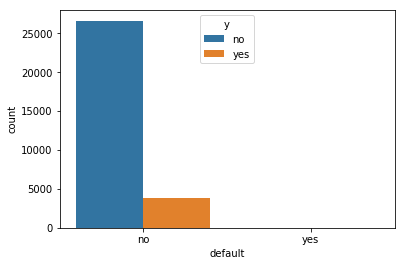

In [12]:
#default
#sns.catplot(x='y', col='default', kind='count', data=dataset)
sns.countplot(data=dataset,x = 'default',hue = 'y')

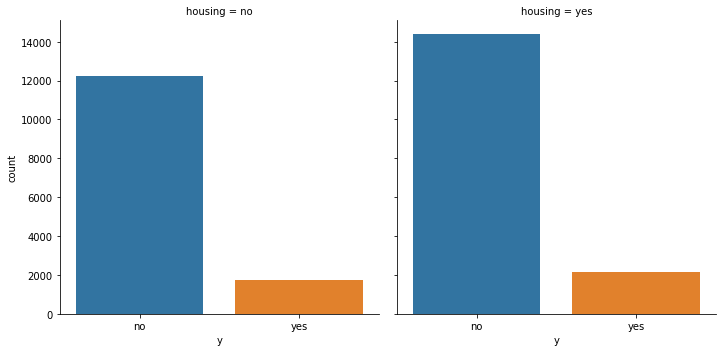

In [13]:
#housing
sns.catplot(x='y', col='housing', kind='count', data=dataset)

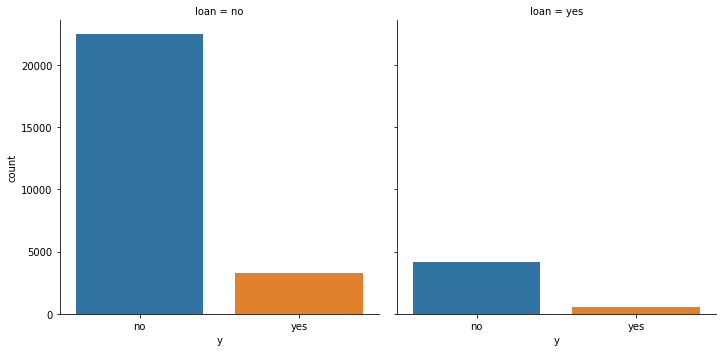

In [14]:
#loan
sns.catplot(x='y', col='loan', kind='count', data=dataset)

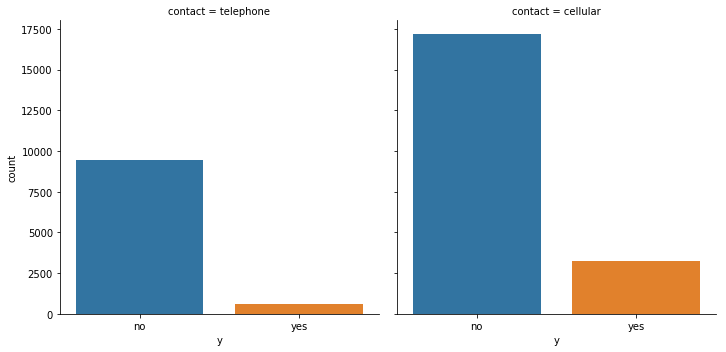

In [15]:
#contact
sns.catplot(x='y', col='contact', kind='count', data=dataset)

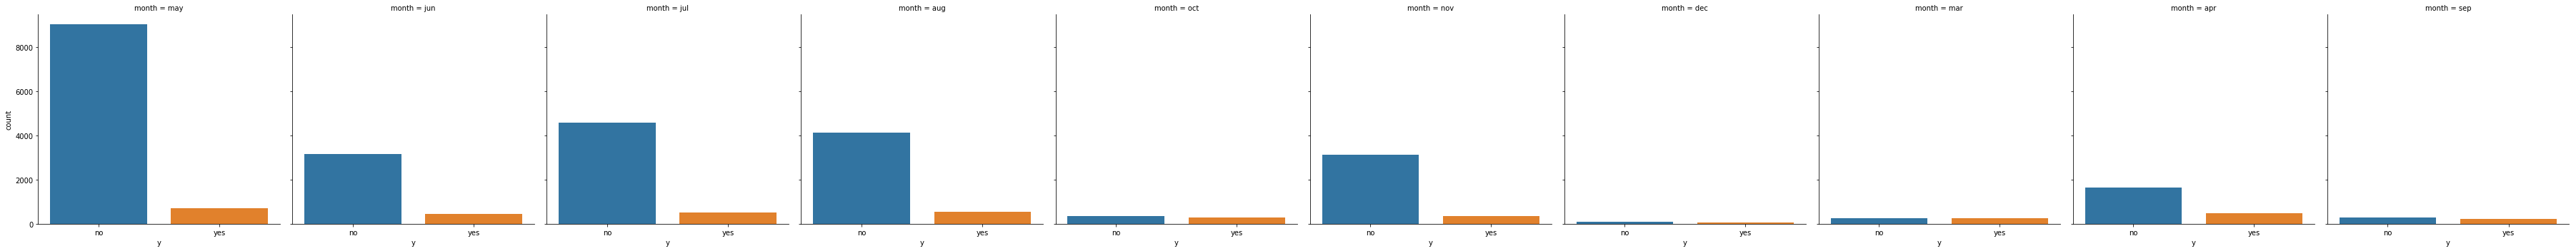

In [18]:
#month
sns.catplot(x='y', col='month', kind='count', data=dataset)

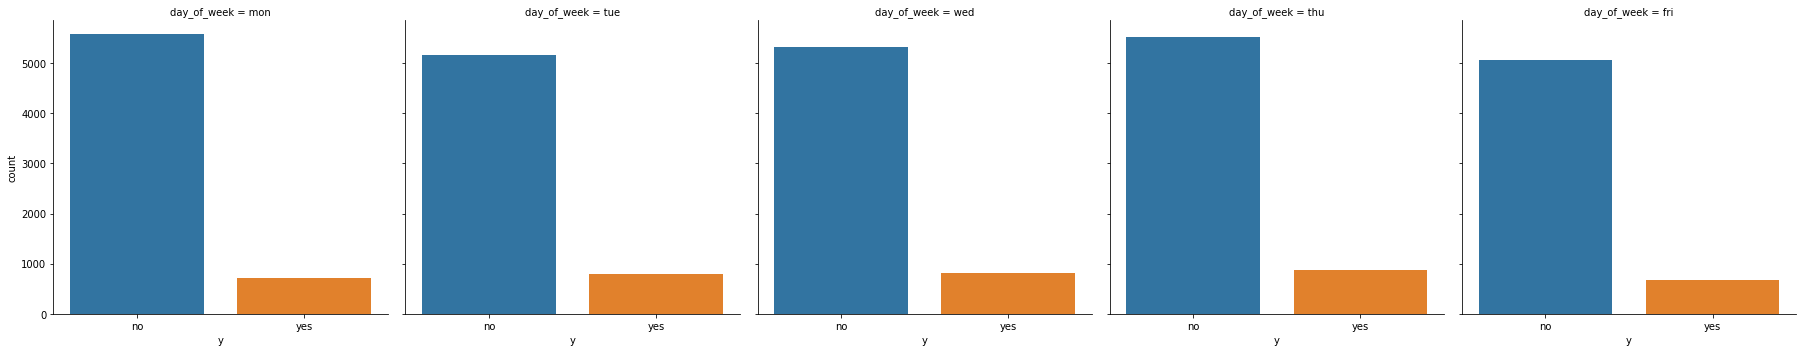

In [19]:
#day_of_week
sns.catplot(x='y', col='day_of_week', kind='count', data=dataset)

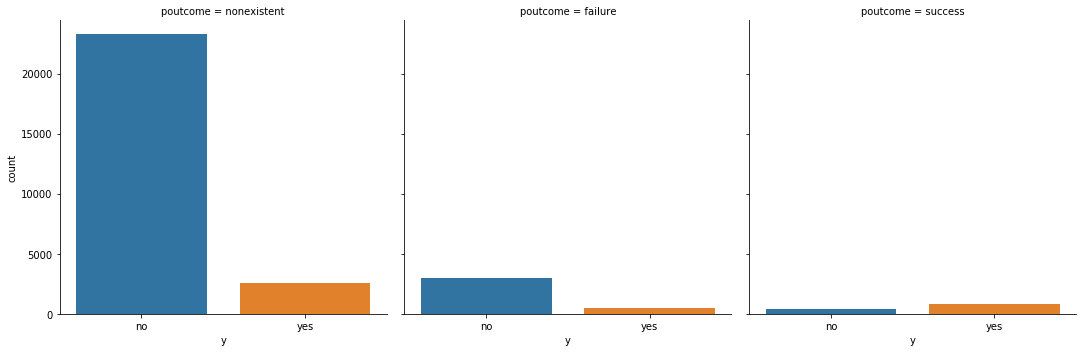

In [20]:
#poutcome
sns.catplot(x='y', col='poutcome', kind='count', data=dataset)

### Quantitative Analysis

C:\Users\barba\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


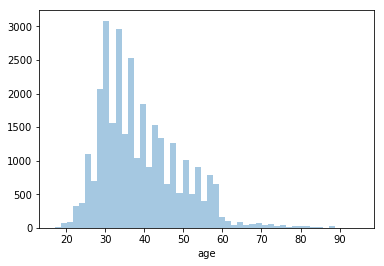

In [22]:
dataset_drop = dataset.dropna()
sns.distplot(dataset_drop.age, kde=False);

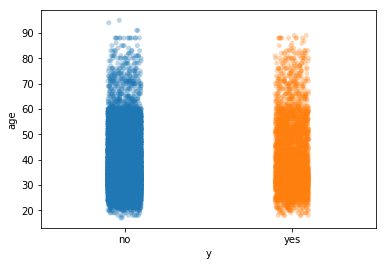

In [23]:
# univariate analysis
sns.stripplot(x='y', y='age', data=dataset, alpha=0.3, jitter=True);

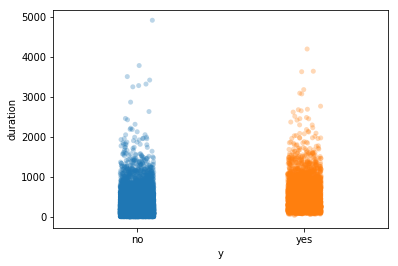

In [24]:
sns.stripplot(x='y', y='duration', data=dataset, alpha=0.3, jitter=True)

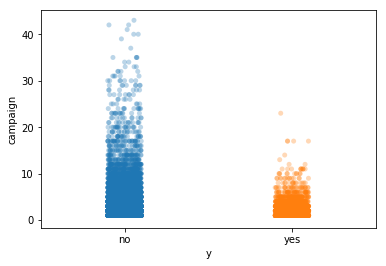

In [25]:
sns.stripplot(x='y', y='campaign', data=dataset, alpha=0.3, jitter=True)

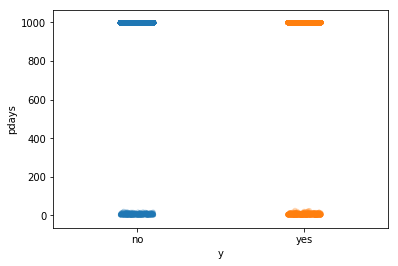

In [26]:
sns.stripplot(x='y', y='pdays', data=dataset, alpha=0.3, jitter=True)

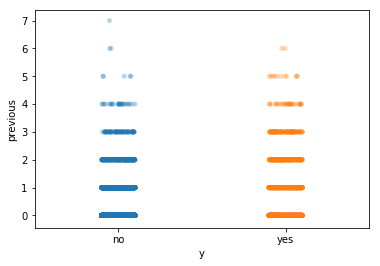

In [27]:
sns.stripplot(x='y', y='previous', data=dataset, alpha=0.3, jitter=True)

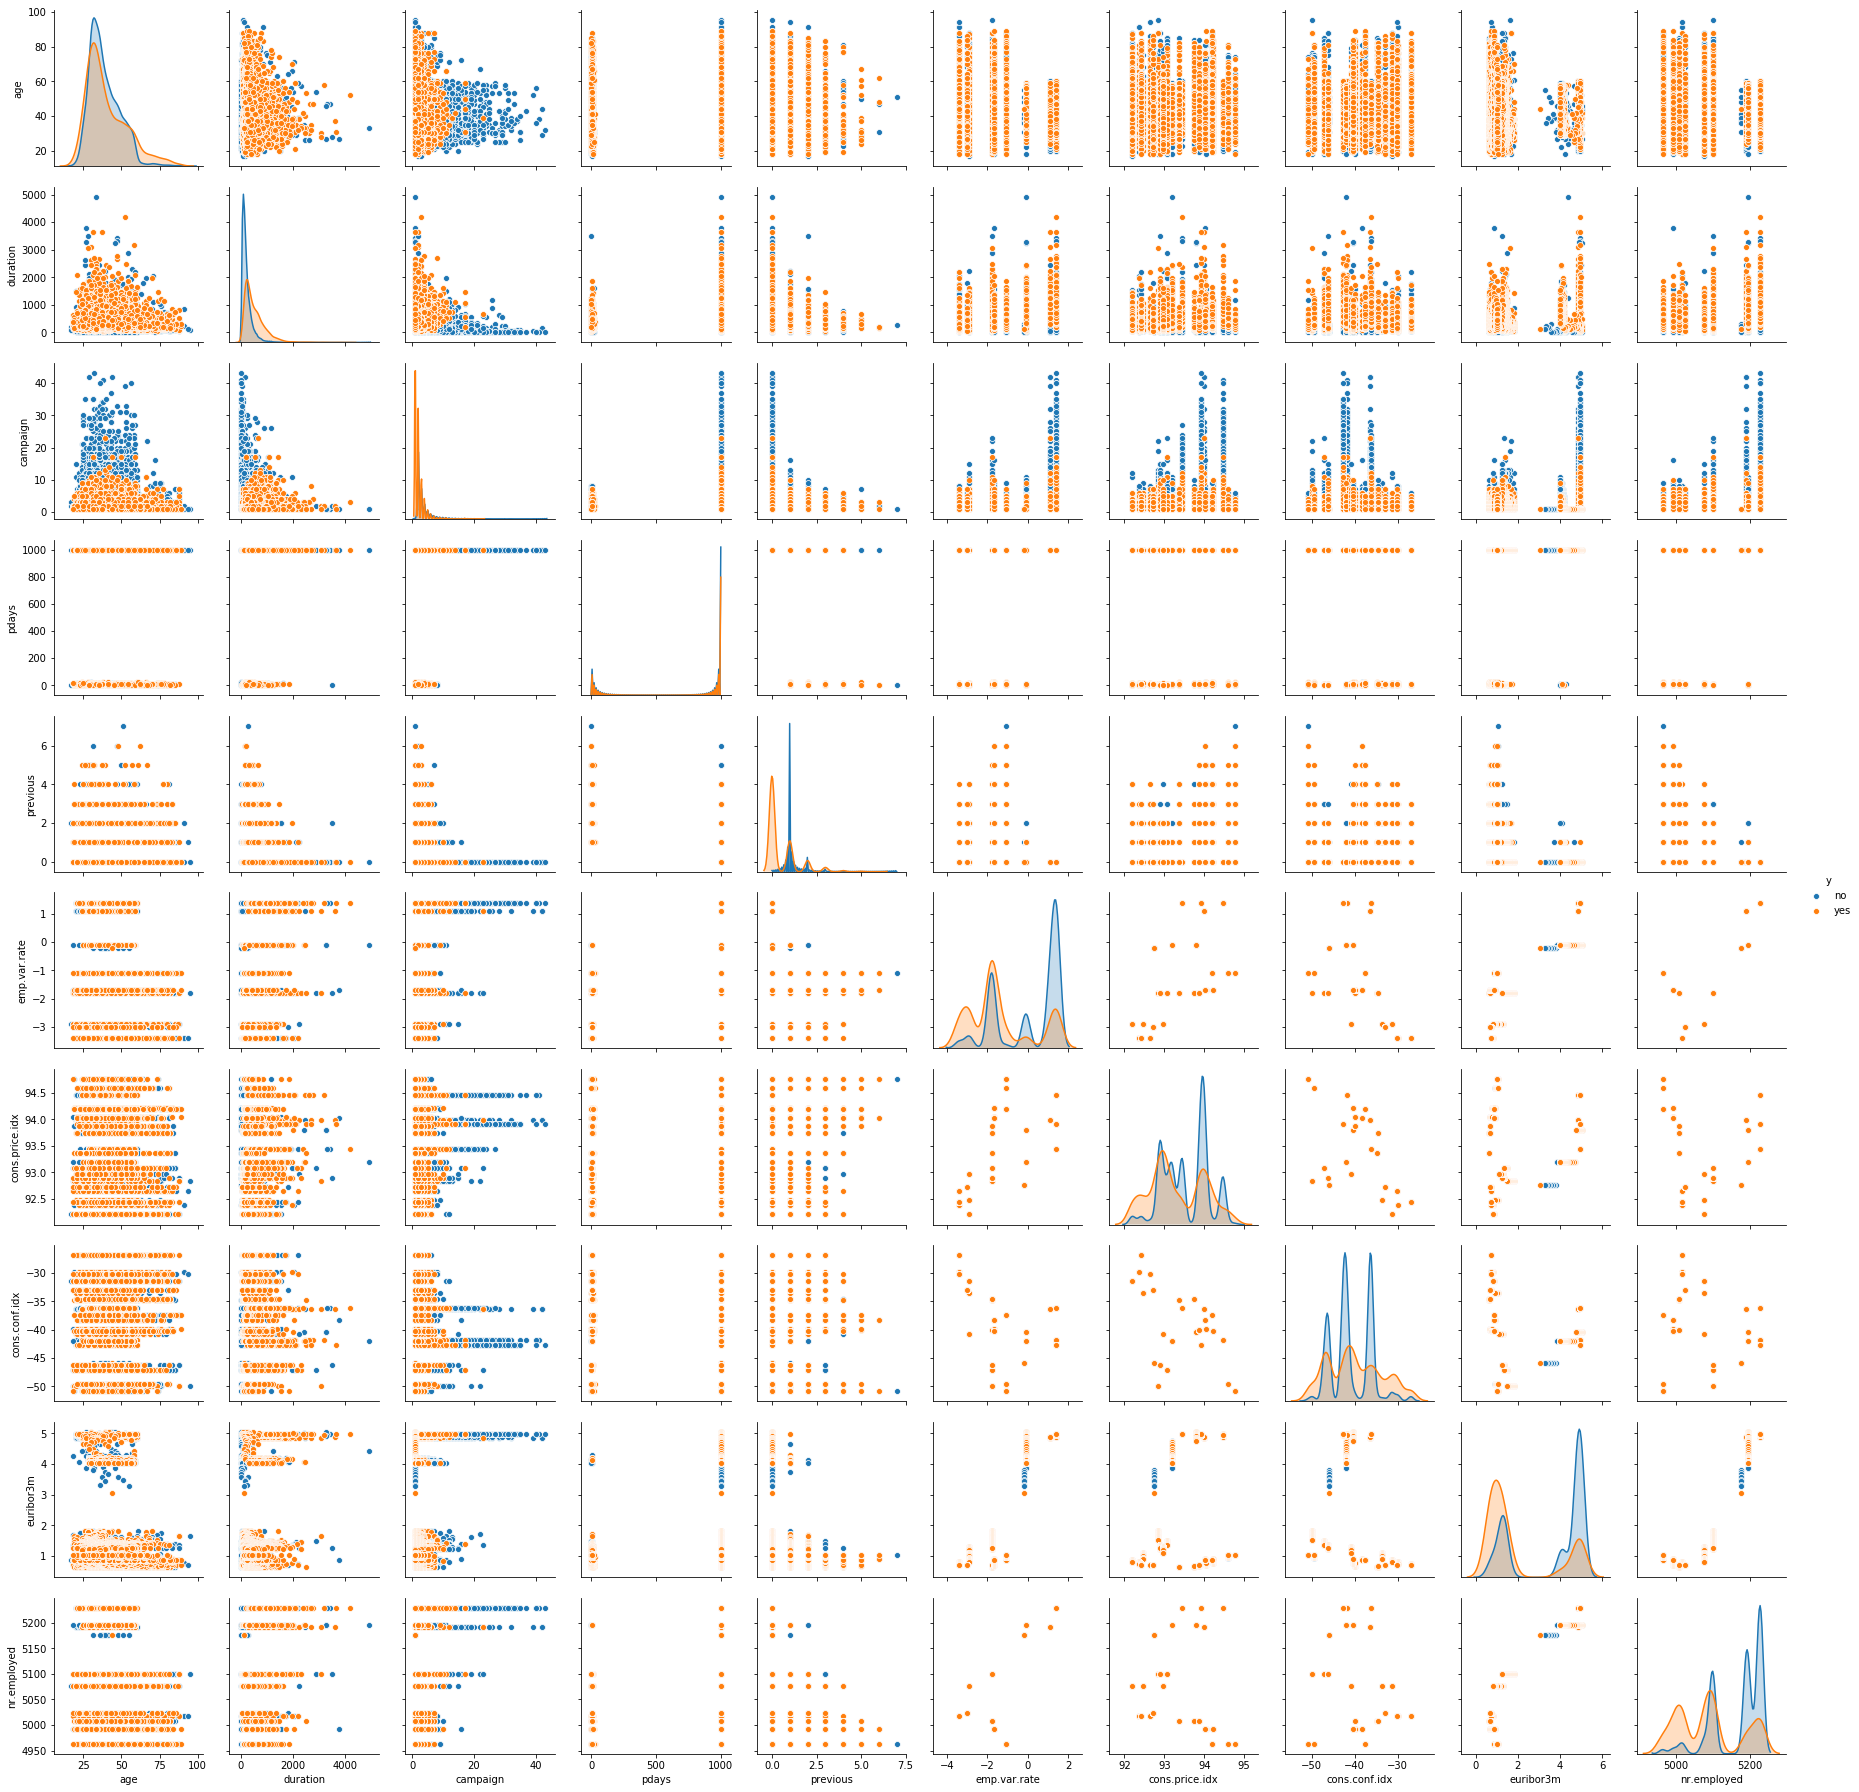

In [28]:
#matrix of axes, shows the relationship between every pair of columns in the dataframe.
sns.pairplot(dataset_drop, hue='y')

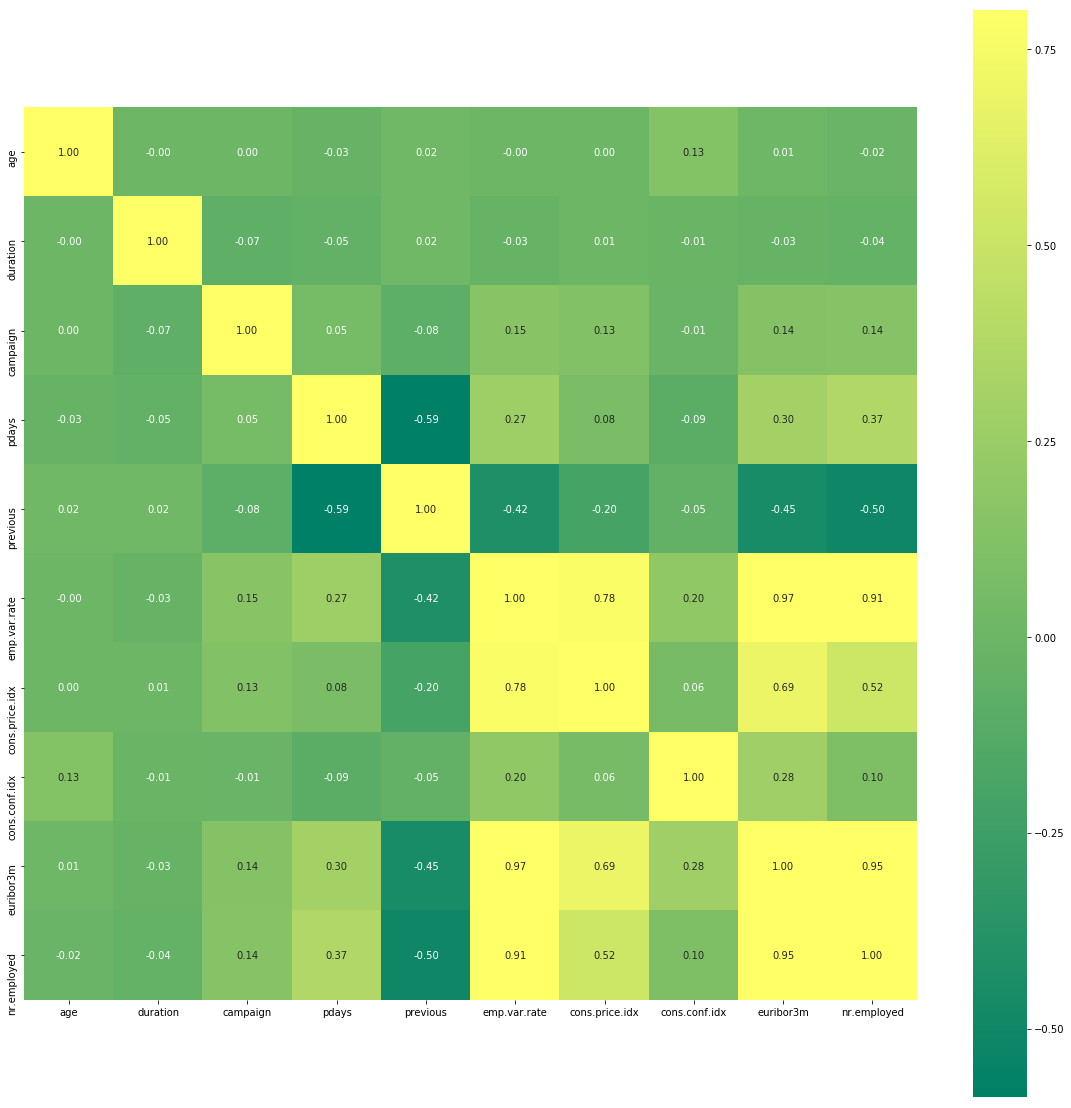

In [45]:
corrmat = dataset.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, fmt='.2f', cmap = "summer")
plt.show()